In [2]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt

Q2:

In [25]:
C = np.zeros(250,)
A = np.ones(250,)
B = np.ones(250,)
C[10:70] = 1
B[70:120] = 0
A[70:120] = 0

Text(0, 0.5, 'Qp')

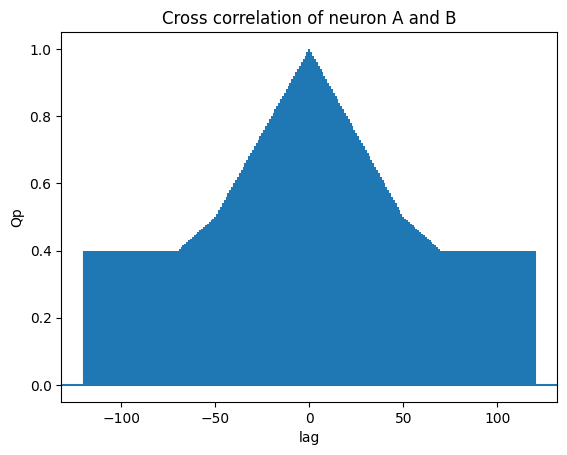

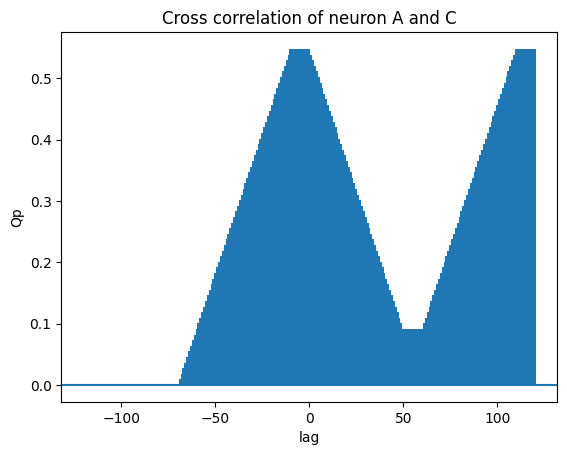

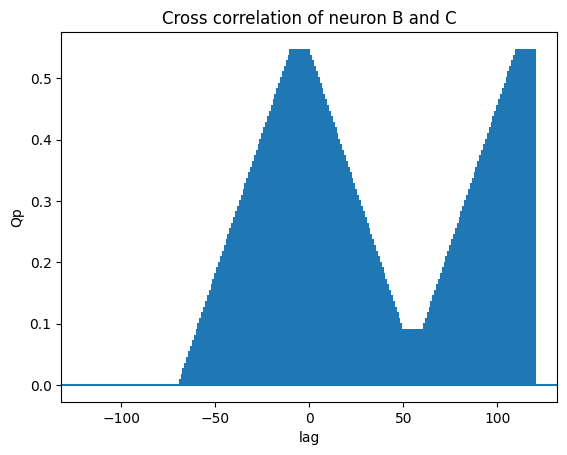

In [26]:
plt.xcorr(A, B, maxlags=120)
plt.title('Cross correlation of neuron A and B')
plt.xlabel('lag')
plt.ylabel('Qp')
plt.figure()
plt.xcorr(A, C, maxlags=120)
plt.title('Cross correlation of neuron A and C')
plt.xlabel('lag')
plt.ylabel('Qp')
plt.figure()
plt.xcorr(B, C, maxlags=120)
plt.title('Cross correlation of neuron B and C')
plt.xlabel('lag')
plt.ylabel('Qp')

Q3:

In [3]:
spike_times = genfromtxt("Q3spikeTime.csv", delimiter=",")
stim_times = genfromtxt("Q3stimTime.csv", delimiter=",")

In [ ]:
# because I saw there were some nans in the uploaded files, I made sure to leave only the parts in the arrays that aren't Nan.
spike_times = spike_times[np.logical_not(np.isnan(spike_times))]
stim_times = stim_times[np.logical_not(np.isnan(stim_times))]

In [ ]:
# calculate the rate of stimulation by differentiating between the each two adjacent stimuli and finding the unique intervals
diff_stimuli = np.unique(np.round(np.diff(stim_times),3))
print(diff_stimuli)

Stimulus repeats every 1 second.
I'd calculate the mean prior to first stimulation (10.501 sec).

In [6]:
# sum all spikes prior to first stimumation and devide by the time window up to forst stimulus,
# to find mean firing rate prior to stimulation.
prior_stim_rate = np.sum(np.array([spike_times<stim_times[0]]).astype(int))/stim_times[0]
print('Prior stimultion firing rate:', round(prior_stim_rate,3), 'Hz')


Prior stimultion firing rate: 21.522 Hz


In [7]:
# initiate vectors to keep average firing rate of each time window, for all repeating stimulus windows.
spikes_count_recording = []
spikes_per_250ms = []
spikes_per_500ms = []
spikes_per_750ms = []
spikes_per_1000ms = []

for i, _ in enumerate(stim_times):
    # take the spike times between i-th stimulus time and i+1sec, for finding mean firing rate over 1 sec (whole window between 2 stimuli):
    relevant_spikes = np.logical_and(spike_times>stim_times[i], spike_times <= stim_times[i]+1) 
    spikes_per_sec = np.sum(relevant_spikes)/1 # average across 1 sec window
    spikes_count_recording.append(spikes_per_sec) # append the average firing rate found in each i-th window
    spikes_per_250ms.append(np.sum(np.logical_and(spike_times>stim_times[i], spike_times <= stim_times[i]+0.25)/0.25)) # same for 0-0.25sec
    spikes_per_500ms.append(np.sum(np.logical_and(spike_times>stim_times[i]+0.25, spike_times <= stim_times[i]+0.5))/0.25)# same for 0.25-0.5 sec
    spikes_per_750ms.append(np.sum(np.logical_and(spike_times>stim_times[i]+0.5, spike_times <= stim_times[i]+0.75))/0.25)# same for 0.5-0.75 sec
    spikes_per_1000ms.append(np.sum(np.logical_and(spike_times>stim_times[i]+0.75, spike_times <= stim_times[i]+1))/0.25)# same for 0.25-1 sec 

# average for all mean firings that were calculate post different stimuli:
post_stim_rate = np.mean(spikes_count_recording)
spikes_per_250ms = np.mean(spikes_per_250ms)
spikes_per_500ms = np.mean(spikes_per_500ms)
spikes_per_750ms = np.mean(spikes_per_750ms)
spikes_per_1000ms = np.mean(spikes_per_1000ms)
print('Post stimultion firing rate averaging on each stimulation period (1 sec):', np.round(post_stim_rate, 3), 'Hz')

Post stimultion firing rate averaging on each stimulation period (1 sec): 23.58 Hz


Q3, d) window of 250ms

In [9]:
x = np.arange(-250,1000) # pre-stimulus up to 1 second post stimulus
y = np.ones(1250,)
for i, rate in enumerate([prior_stim_rate, spikes_per_250ms, spikes_per_500ms, spikes_per_750ms, spikes_per_1000ms]):
    y[i*250:i*250+250] = rate*np.ones(250,) # The rate was being calculated for a 250ms window and therefore it is streched across the 250ms window
    # it was calculated for.


Text(0, 0.5, 'Firing Rate (Hz)')

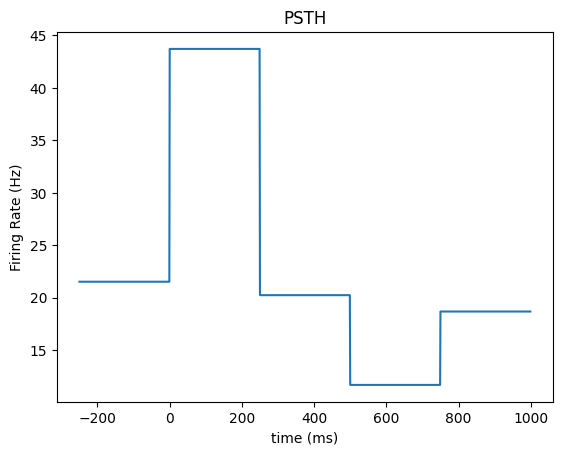

In [10]:
plt.plot(x, y)
plt.title('PSTH')
plt.xlabel('time (ms)')
plt.ylabel('Firing Rate (Hz)')